# ML in Python- Supervised Learning Algorithms KNN

### 1) Importing Libraries and Setting Path

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [2]:
#Create a path to where your data is stored.
path = r'C:\Users\wjzak\Dropbox\Career Foundry\Data Specialization\Module 1\12-25- ClimateWins Project\Data Sets'

In [3]:
#Read in the Regular weather data.
climate = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [4]:
# Drop columns starting with 'GDANSK', 'ROMA', or 'TOURS' from climate dataset
climate = climate.drop(columns=[col for col in climate.columns if col.startswith(('GDANSK', 'ROMA', 'TOURS'))])

In [5]:
# Keep only DATE, MONTH, and temperature-related columns in climate
temp_cols = [col for col in climate.columns if 'temp' in col]
climate = climate[['DATE', 'MONTH'] + temp_cols]

In [6]:
climate

,DATE,MONTH,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,6.5,0.8,10.9,3.7,-0.9,7.9,2.4,-0.4,...,5.9,-5.9,-8.5,-3.2,4.2,2.2,4.9,8.5,6.0,10.9
1,19600102,1,6.1,3.3,10.1,2.9,2.2,4.4,2.3,1.4,...,4.9,-9.5,-10.5,-8.5,4.0,3.0,5.0,8.9,5.6,12.1
2,19600103,1,8.5,5.1,9.9,3.1,-0.5,6.4,2.7,1.7,...,3.1,-9.5,-10.0,-8.9,2.4,1.3,4.1,10.5,8.1,12.9
3,19600104,1,6.3,3.8,10.6,2.0,-2.0,3.0,2.0,0.4,...,4.9,-11.5,-12.9,-10.0,1.2,0.4,2.3,7.4,7.3,10.6
4,19600105,1,3.0,-0.7,6.0,2.0,0.7,2.8,2.5,1.1,...,4.9,-9.3,-12.0,-6.5,3.3,0.8,4.3,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,15.9,11.4,21.4,18.2,12.1,24.4,11.7,7.9,...,12.0,0.6,-1.4,2.6,11.5,8.2,14.2,10.7,7.9,13.5
22946,20221028,10,16.7,14.3,21.9,15.9,10.6,21.2,11.7,7.9,...,11.7,2.3,0.6,4.0,12.5,11.0,14.3,10.7,7.9,13.5
22947,20221029,10,16.7,13.1,22.4,13.4,8.6,18.2,11.7,7.9,...,14.2,3.3,2.1,4.5,13.1,12.1,14.4,10.7,7.9,13.5
22948,20221030,10,15.4,11.6,21.1,15.0,9.1,20.9,11.7,7.9,...,8.1,3.4,2.7,4.1,7.5,5.1,12.4,10.7,7.9,13.5


In [7]:
#Read in the Pleasant weather data.
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
### Create an 'X' matrix by dropping the unneeded columns
X = climate.drop(['DATE', 'MONTH'], axis=1)
y = pleasant.drop(['DATE'], axis=1)

In [9]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [10]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [ ]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) 
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

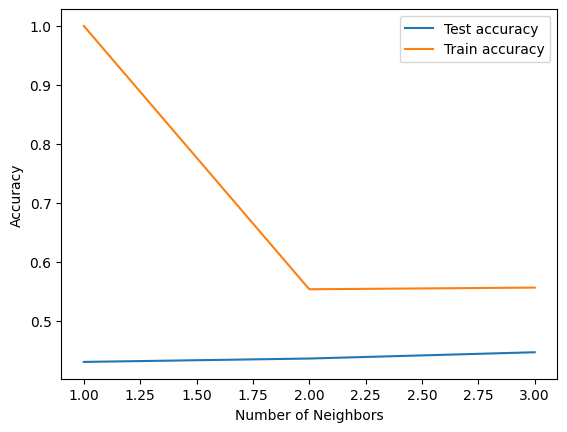

In [40]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

d:\Virtual Env\my_project_env_pc\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


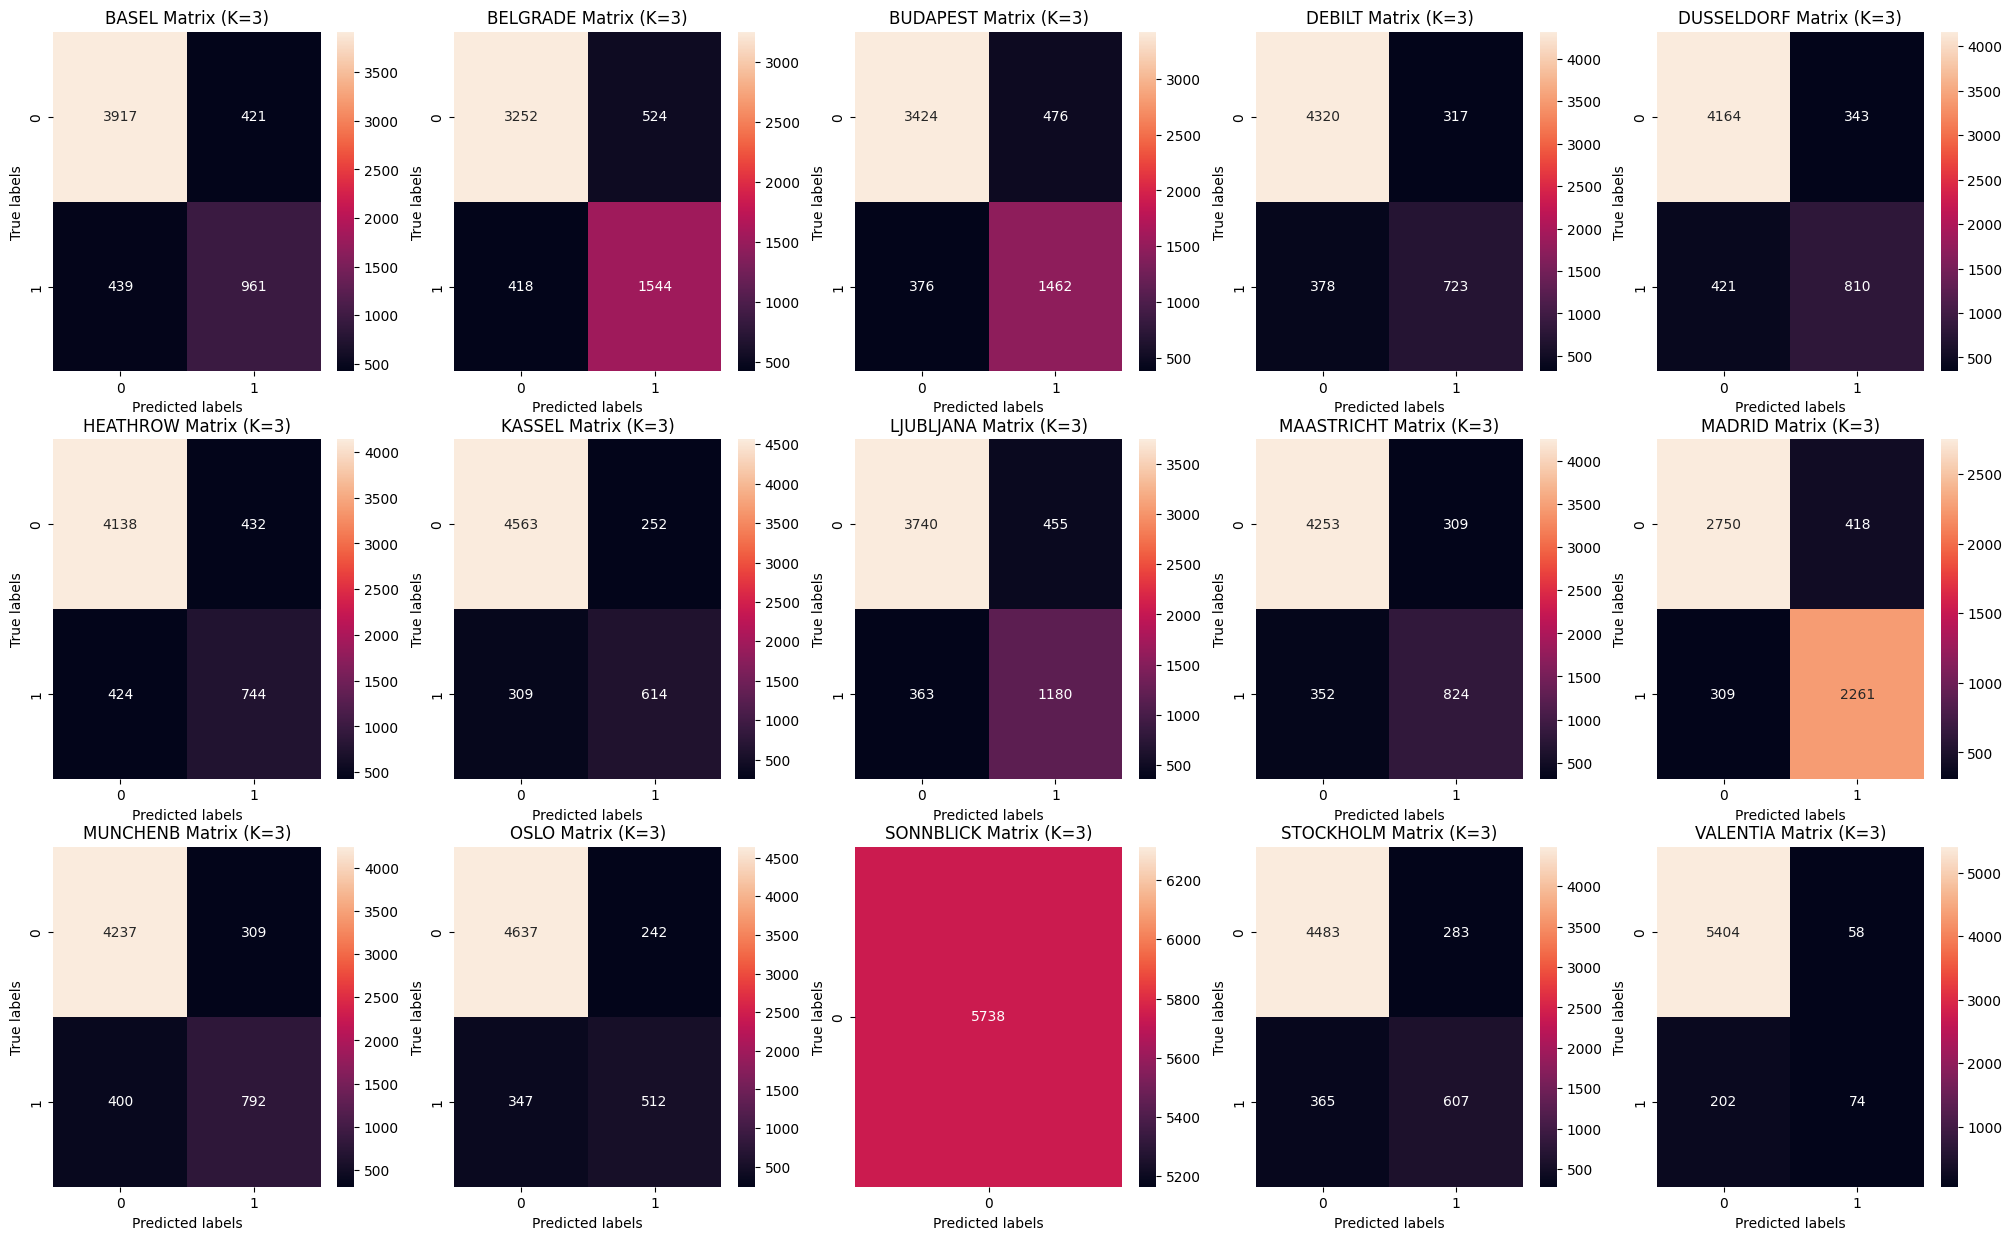

In [41]:
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix (K='+ str(k) +')'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [42]:
#Run the model with neighbors equal to 1 to 20, test the accuracy
k_range = np.arange(1,20)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 1
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 2
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 3
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 4
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 5
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 6
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 7
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 8
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 9
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 10
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 11
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 12
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 13
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 14
k - [ 1  2  3  4  5  6 

<function matplotlib.pyplot.show(close=None, block=None)>

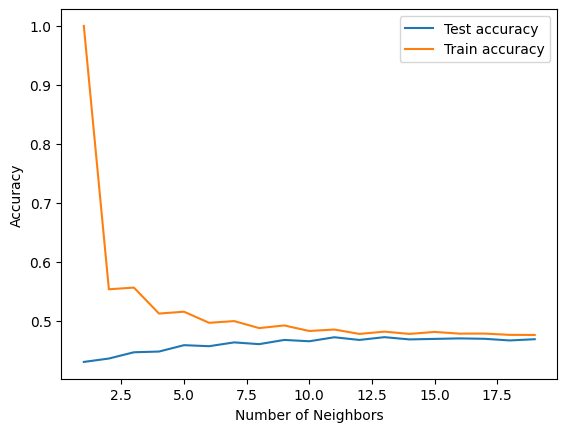

In [43]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

d:\Virtual Env\my_project_env_pc\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


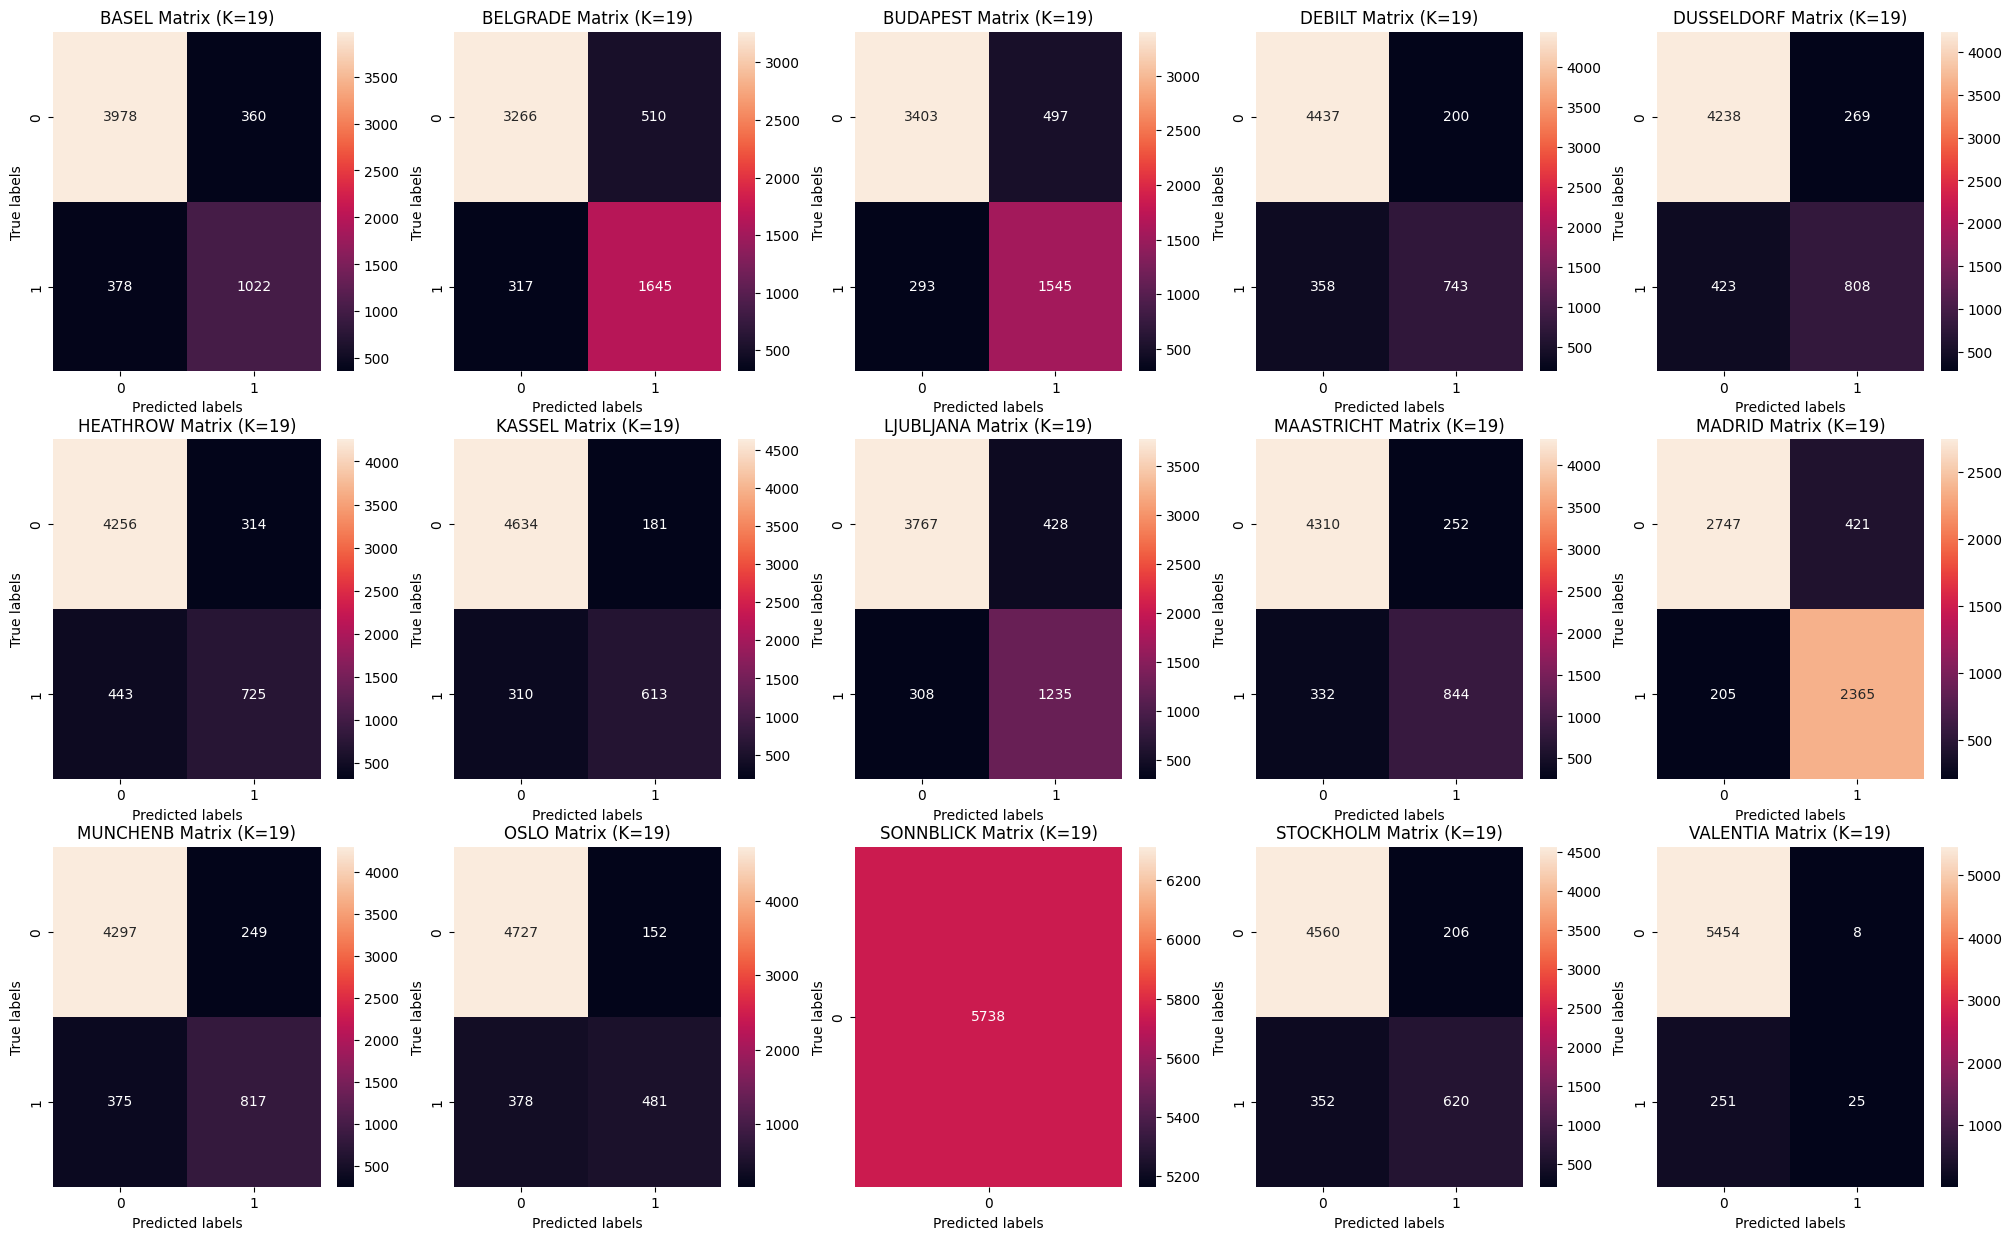

In [45]:
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix (K='+ str(k) +')'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [46]:
# Create a summary table of confusion matrices by city
from sklearn.metrics import classification_report

matrix_data = []

for idx, location in enumerate(locations):
    cm = confusion_matrix(y_test.loc[:, location + key], y_pred[:, idx], labels=[0, 1])
    
    # Extract values from confusion matrix (ensure it's 2x2)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
    else:
        # Handle edge cases where one class is missing
        tn, fp, fn, tp = 0, 0, 0, 0
        if cm.shape == (1, 1):
            # Only one class present
            tn = cm[0, 0] if cm[0, 0] > 0 else 0
    
    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    matrix_data.append({
        'City': location,
        'True Negatives': tn,
        'False Positives': fp,
        'False Negatives': fn,
        'True Positives': tp,
        'Accuracy': round(accuracy, 3),
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'F1 Score': round(f1, 3)
    })

# Create DataFrame and display
confusion_summary = pd.DataFrame(matrix_data)
print("Confusion Matrix Summary by City:")
print(confusion_summary.to_string(index=False))
confusion_summary


Confusion Matrix Summary by City:
      City  True Negatives  False Positives  False Negatives  True Positives  Accuracy  Precision  Recall  F1 Score
     BASEL            3978              360              378            1022     0.871      0.740   0.730     0.735
  BELGRADE            3266              510              317            1645     0.856      0.763   0.838     0.799
  BUDAPEST            3403              497              293            1545     0.862      0.757   0.841     0.796
    DEBILT            4437              200              358             743     0.903      0.788   0.675     0.727
DUSSELDORF            4238              269              423             808     0.879      0.750   0.656     0.700
  HEATHROW            4256              314              443             725     0.868      0.698   0.621     0.657
    KASSEL            4634              181              310             613     0.914      0.772   0.664     0.714
 LJUBLJANA            3767            

,City,True Negatives,False Positives,False Negatives,True Positives,Accuracy,Precision,Recall,F1 Score
0,BASEL,3978,360,378,1022,0.871,0.740,0.730,0.735
1,BELGRADE,3266,510,317,1645,0.856,0.763,0.838,0.799
2,BUDAPEST,3403,497,293,1545,0.862,0.757,0.841,0.796
3,DEBILT,4437,200,358,743,0.903,0.788,0.675,0.727
4,DUSSELDORF,4238,269,423,808,0.879,0.750,0.656,0.700
5,HEATHROW,4256,314,443,725,0.868,0.698,0.621,0.657
6,KASSEL,4634,181,310,613,0.914,0.772,0.664,0.714
7,LJUBLJANA,3767,428,308,1235,0.872,0.743,0.800,0.770
8,MAASTRICHT,4310,252,332,844,0.898,0.770,0.718,0.743
9,MADRID,2747,421,205,2365,0.891,0.849,0.920,0.883
